In [1]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
def plot_one_record(record_zipped, dimension, x_timeline):
    for key in record_zipped.keys():
        plt.plot(x_timeline, record_zipped[key][dimension], label = str(key))
    plt.legend(title="Vehicle ID")
    ylabel = ("Acceleration" if dimension == 0 else ("Speed" if dimension == 1 else "Position"))
    plt.ylabel(ylabel)
    plt.xlabel("Time (second)")
    plt.show()

In [3]:
def zip_records(records):
    record_zipped = {}
    for key in records.keys():
        record_zipped[key] = np.array(list(zip(*records[key].values())))
    return record_zipped

In [4]:
def plot_records(records):
    x_timeline = np.array(list(records[0].keys()))
    x_timeline = x_timeline / 1000
    record_zipped = zip_records(records)
    for dim in range(3):
        plot_one_record(record_zipped, dim, x_timeline)

Start running CAV simulation: 5-vehicle-platoon with 100ms gap in 30 seconds.
CAV dequeing simulation finished.


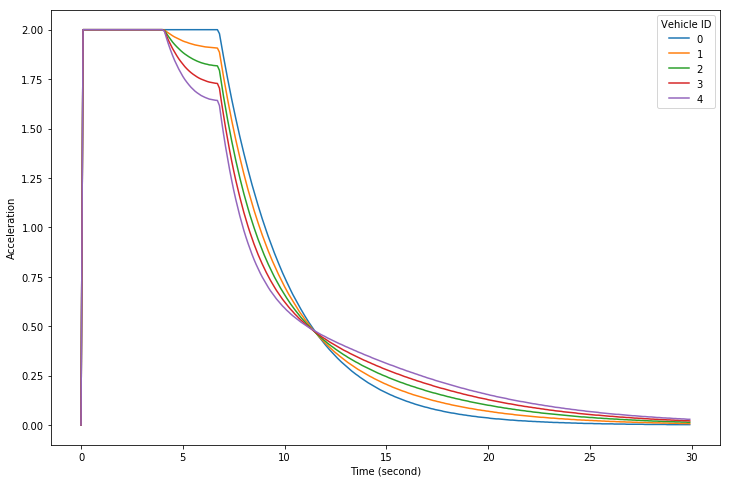

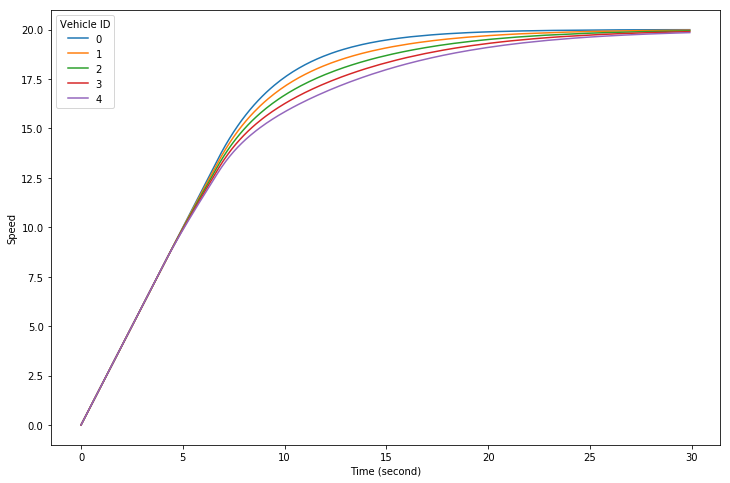

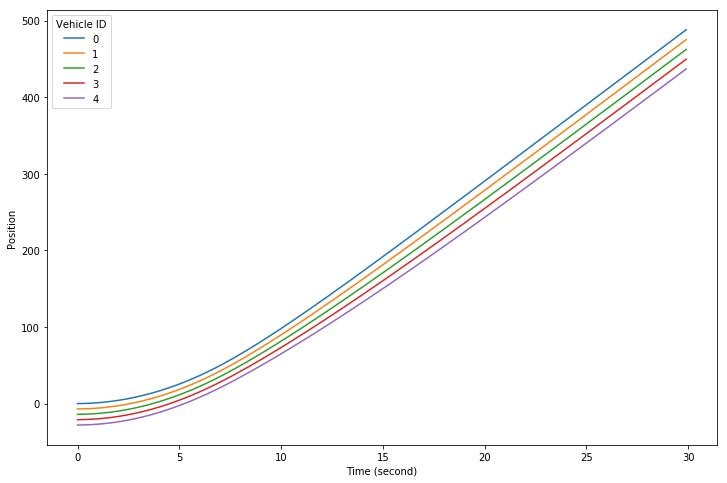

In [5]:
simulation_time = 30 # seconds
number_vehicles = 5 # number of vehicles
intended_speed = 20 # intended speed / speed limit of the road

sim = Simulation(time = simulation_time)
p = sim.run_cav_simluation(n = number_vehicles, intend_speed = intended_speed)
records = p.records
plot_records(records)

Start running human-driver simulation (Gipps Model): 5-vehicle-platoon with 0.6666666666666666s reaction time in 30 seconds.
Human-driver simulation (Gipps Model) deque finished.


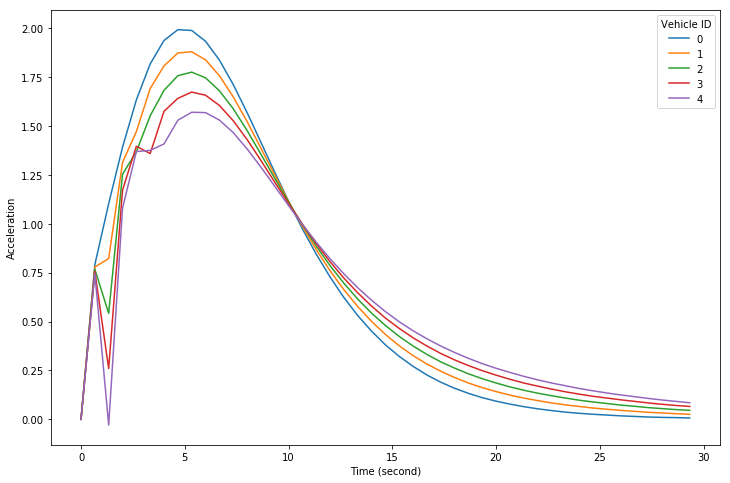

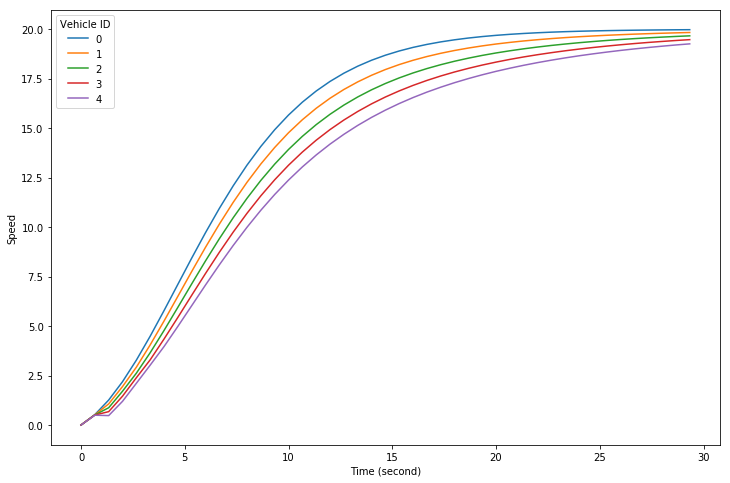

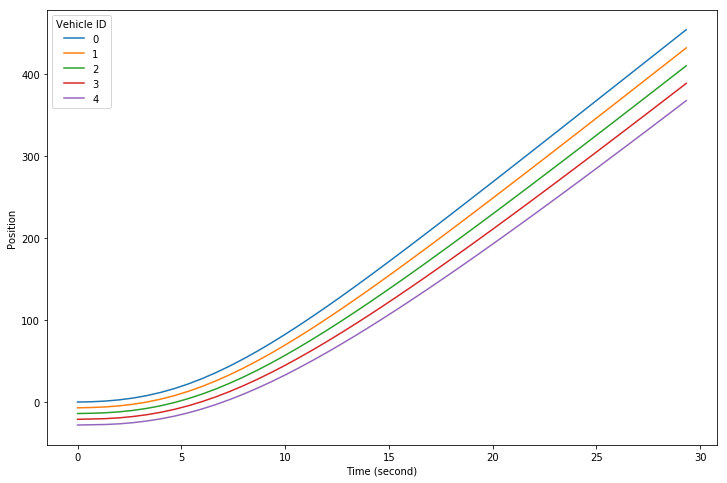

In [6]:
randomness = False # Gipps Model randomness
p = sim.run_gipps_simluation(n = number_vehicles, intend_speed = intended_speed, randomness = randomness)
records = p.records
plot_records(records)

In [7]:
sim_length_after_stop = 20

Start running CAV simulation: 5-vehicle-platoon with 100ms gap in 30 seconds.
CAV dequeing simulation finished.
Vehicle 0 start maximum deceleration...
Braking simulation finishes.


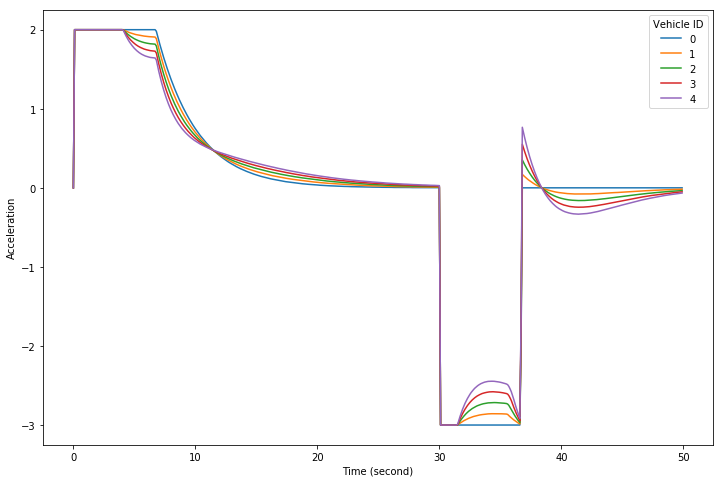

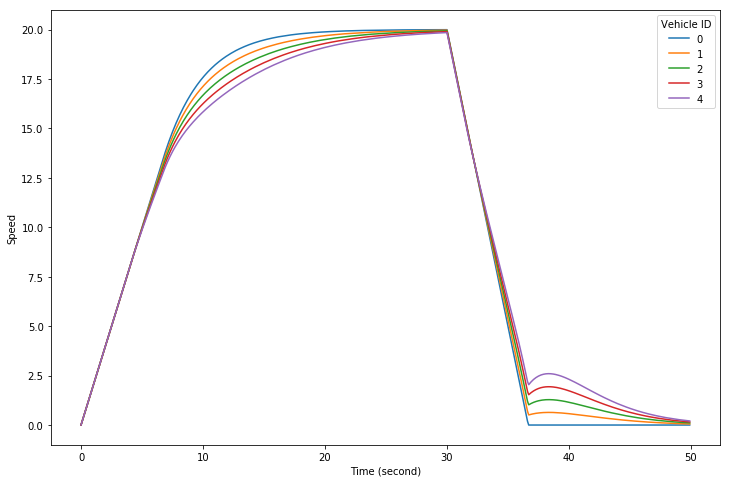

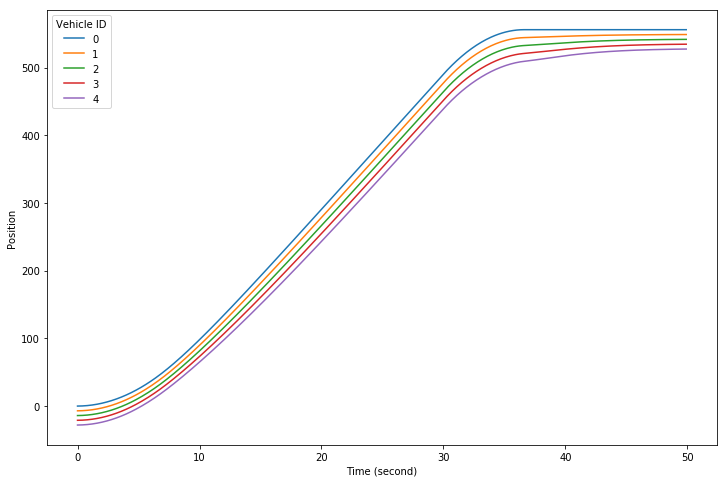

In [8]:
p = sim.run_cav_simluation_with_braking(n = number_vehicles, intend_speed = intended_speed,sim_length_after_stop = sim_length_after_stop,stop_veh_idx = 0)
records = p.records
plot_records(records)


Start running human-driver simulation (Gipps Model): 5-vehicle-platoon with 0.6666666666666666s reaction time in 30 seconds.
Human-driver simulation (Gipps Model) deque finished.
Vehicle 0 start maximum deceleration...
Braking simulation finishes.


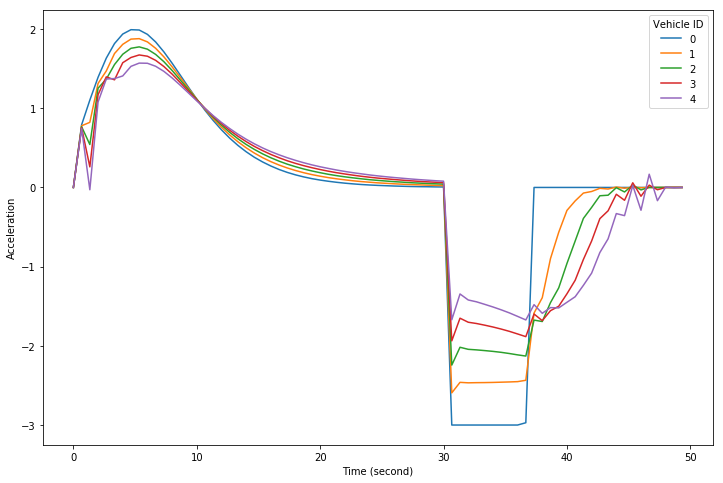

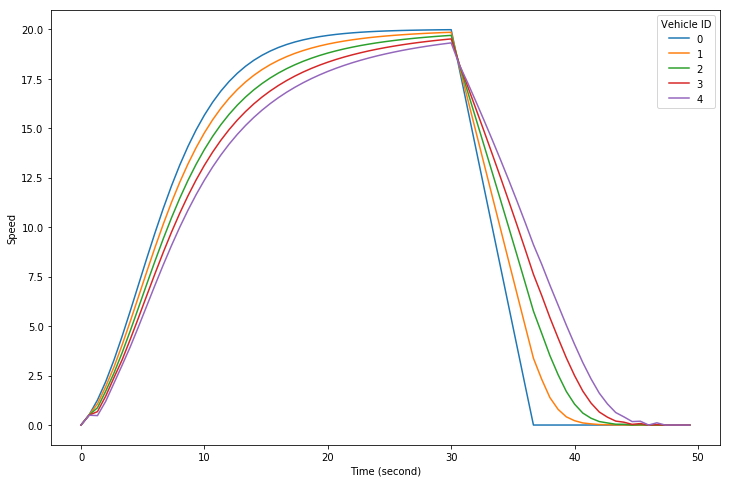

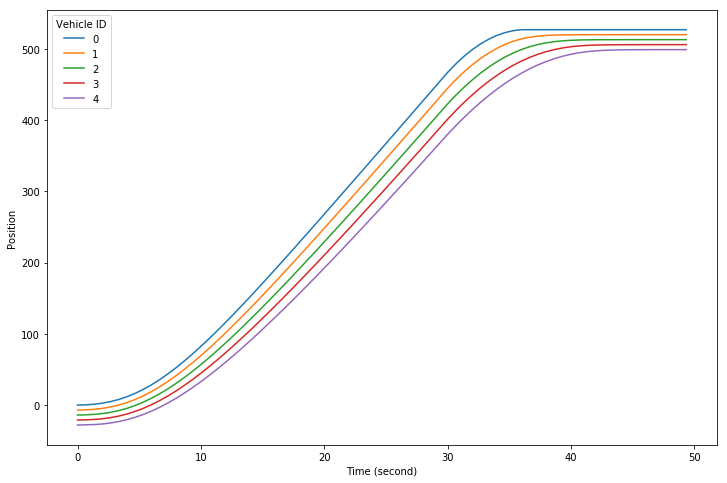

In [9]:
p = sim.run_gipps_simluation_with_braking(n = number_vehicles, randomness = randomness, intend_speed = intended_speed,sim_length_after_stop = sim_length_after_stop,stop_veh_idx = 0)
records = p.records
plot_records(records)